# Module 1 Code Challenge Review 

_June 30, 2020_ 

## Part II. Code Challenge Reviews

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from a file 
#df = pd.read_csv('file')
df = sns.load_dataset('iris')
df.head


<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [3]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# examine the dimensions of it
df.shape

(150, 5)

In [6]:
# check to see if you have missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#introduce some missing and remove
df.iloc[2:5, 2] = np.nan
df.iloc[5:10, 3] = np.nan
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    3
petal_width     5
species         0
dtype: int64

In [8]:
# remove missing values (rows and columns)
df.dropna(subset = ['petal_width'], axis = 0)  #inplace for a permanent change

#df.petal_width.dropna() would only remove the missing values from the series and not the full df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,NaN,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
# to drop missing value column wise, you do 
df.dropna(subset = ..., axis=1)

In [9]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df.sepal_length.map(lambda x: x * 10)
#df['sepal_length_10_way2'] = df.sepal_length * 10

In [13]:
# get the top 10 longest flowers with the longest sepals
selection = df.sepal_length.sort_values(ascending = False)
selection.head(10)

131    7.9
135    7.7
117    7.7
118    7.7
122    7.7
105    7.6
130    7.4
107    7.3
109    7.2
125    7.2
Name: sepal_length, dtype: float64

In [14]:
# how many flowers are in each species?
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### 2. Data Visualization

In [43]:
# let's plot the average pedal length for each species of iris 

y = df.groupby(['species'])['petal_length'].mean()
x = y.index

In [44]:
# to calculat mean petal length x


Text(0, 0.5, 'length in cm')

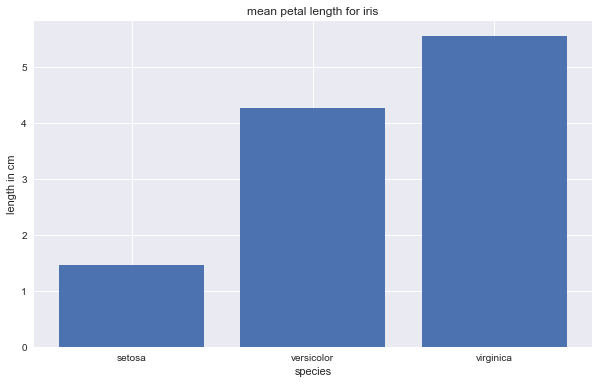

In [45]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)

# add a title
ax.set_title('mean petal length for iris')
ax.set_xlabel('species')
ax.set_ylabel('length in cm')

<BarContainer object of 4 artists>

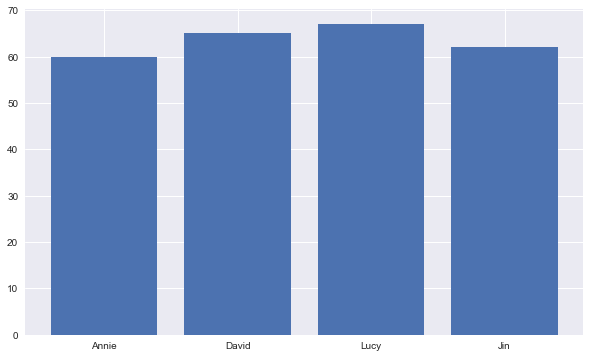

In [41]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]
figure, ax = plt.subplots(figsize = (10,6))
plt.bar(persons, height)


In [42]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.117570,0.867469,0.809910,1.000000
sepal_width,-0.117570,1.000000,-0.423270,-0.356808,-0.117570
petal_length,0.867469,-0.423270,1.000000,0.959259,0.867469
petal_width,0.809910,-0.356808,0.959259,1.000000,0.809910
sepal_length_10,1.000000,-0.117570,0.867469,0.809910,1.000000


Can you describe the relationship above?

## Part III. Statistics 

In [50]:
# calculate the mean and median value for sepal length 
mean1 = df.sepal_length.mean()
print(mean1)

median1 = df.sepal_length.median()
print(median1)

df.describe()

5.843333333333335
5.8


,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
count,150.000000,150.000000,147.000000,145.000000,150.000000
mean,5.843333,3.057333,3.806122,1.232414,58.433333
std,0.828066,0.435866,1.750312,0.753499,8.280661
min,4.300000,2.000000,1.000000,0.100000,43.000000
25%,5.100000,2.800000,1.600000,0.300000,51.000000
50%,5.800000,3.000000,4.400000,1.300000,58.000000
75%,6.400000,3.300000,5.100000,1.800000,64.000000
max,7.900000,4.400000,6.900000,2.500000,79.000000


<img src = 'skew.png' width = 400>

In [14]:
# what happens to a distribution when mean and median aren't equal?
#it becomes skewed left or right
#mean gets pulled by outliers more than median so positive skew: mean > median
#for negative skew: mean < median

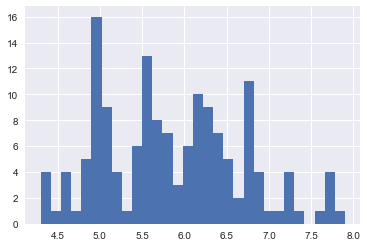

In [45]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?
plt.hist(df['sepal_length'], bins = 30);

Text(0.5, 1.0, 'Length vs Width')

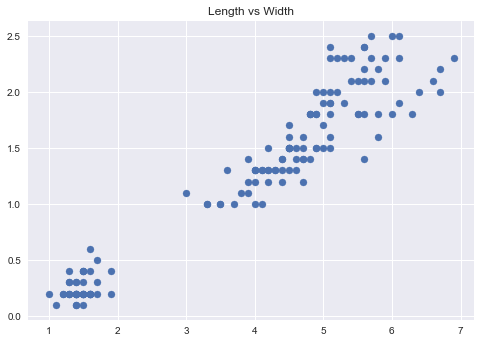

In [52]:
# what does scatterplot tell us?
#relationship between two variables

plt.scatter(df.petal_length, df.petal_width)
plt.title("Length vs Width")

In [53]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10
sepal_length,1.000000,-0.117570,0.867469,0.809910,1.000000
sepal_width,-0.117570,1.000000,-0.423270,-0.356808,-0.117570
petal_length,0.867469,-0.423270,1.000000,0.959259,0.867469
petal_width,0.809910,-0.356808,0.959259,1.000000,0.809910
sepal_length_10,1.000000,-0.117570,0.867469,0.809910,1.000000


## Part IV. Python Data Structure 

In [54]:
pets = {
    'Ginger': {
        'age': 5,
        'type': 'dog',
        'attribute': ['Playful','Cheery','Hyper']
    },
    'Chloe': {
        'age': 1,
        'type': 'cat',
        'attribute': ['Alert','Independent','Playful']
    },
    'Chuck Norris': {
        'age': 8,
        'type': 'dog',
        'attribute': ['Talkative','Independent','Cheery']
    },
    'Joe Rogan': {
        'age': 2,
        'type': 'cat',
        'attribute': ['Hyper','Playful','Energetic']
    }
}

In [55]:
pets['Joe Rogan']

{'age': 2, 'type': 'cat', 'attribute': ['Hyper', 'Playful', 'Energetic']}

In [56]:
# loop through the dictionary, create a list of names containing all pets' names
pet_names = []

for pet in pets:
    pet_names.append(pet)
    
pet_names

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [60]:
pet_names = list(pets.keys())
pet_names

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [70]:
# create a function that returns the names of pets who belongs to a certain type 
def pet_types(pet_dictionary, type_):
    """
    takes in a dictionary of pet description, and returns a list of names for pet that
    fits type_
    
    pet_types(pet_dictionary, 'dog')
    >>> [Ginger, Chuck Norris]
    """
    

In [71]:
pet_types(pets, 'cat')

TypeError: string indices must be integers